In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#from sklearn.preprocessing import LabelEncoder


#  loading the data set 
file = pd.read_csv('BSOM_DataSet_for_HW2.csv')

df1=file[['all_mcqs_avg_n20','all_NBME_avg_n4','CBSE_01','CBSE_02','LEVEL']]

df1['CBSE_02'].fillna(df1['CBSE_02'].mean(),inplace=True)

df1['LEVEL'].fillna(value='A', inplace=True) 

#df.fillna(df['STEP_1'].mean(), inplace=True)
LEVEL = {'A': 0,'B': 1,'C':2,'D':3}

df1.LEVEL = [LEVEL[item] for item in df1.LEVEL] 
#print(df) 

df1.isna().sum()
df1

all_mcqs_avg_n20  all_NBME_avg_n4  CBSE_01  CBSE_02  LEVEL
0               0.736           0.7700       42     68.0      1
1               0.740           0.8000       44     67.0      2
2               0.807           0.8125       41     78.0      0
3               0.886           0.9250       68     91.0      0
4               0.839           0.8550       57     74.0      1
..                ...              ...      ...      ...    ...
110             0.637           0.6825       45     52.0      2
111             0.751           0.8150       53     60.0      2
112             0.811           0.8325       50     77.0      1
113             0.729           0.7275       43     68.0      2
114             0.839           0.8625       54     73.0      1

[115 rows x 5 columns]

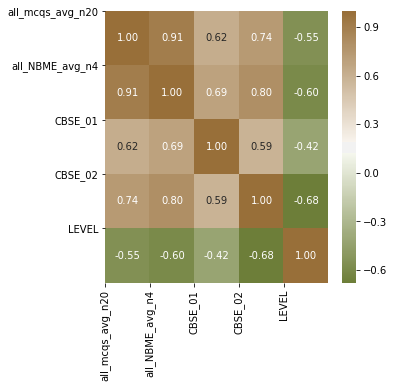

In [2]:
corr = df1.corr()

fig, ax = plt.subplots(figsize=(5, 5))
    
colormap = sns.diverging_palette(100, 50, as_cmap=True)
    
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    
plt.xticks(range(len(corr.columns)), corr.columns);
    
plt.yticks(range(len(corr.columns)), corr.columns)
    
plt.show()

## Feature Selection

In [3]:
df=df1[['all_mcqs_avg_n20','CBSE_01','CBSE_02','LEVEL']]
df.isna().sum()

all_mcqs_avg_n20    0
CBSE_01             0
CBSE_02             0
LEVEL               0
dtype: int64

In [4]:
X= np.array(df.iloc[:,0:3])

#X = np.c_[np.ones((len(X), 1)), X]

#target=df.iloc[:,-1]
#X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.20, random_state =0)


#X_train

## with feature scaling

In [5]:
df2=df.iloc[:,:-1]

df_FS=(df2-df2.mean())/(df2.max()-df2.min())
print(df_FS)
X1= np.array(df_FS)
target=df.iloc[:,-1]
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X1,target, test_size=0.30, random_state =0)



     all_mcqs_avg_n20   CBSE_01   CBSE_02
0           -0.151130 -0.182360 -0.057895
1           -0.137797 -0.125217 -0.077895
2            0.085536 -0.210932  0.142105
3            0.348870  0.560497  0.402105
4            0.192203  0.246211  0.062105
..                ...       ...       ...
110         -0.481130 -0.096646 -0.377895
111         -0.101130  0.131925 -0.217895
112          0.098870  0.046211  0.122105
113         -0.174464 -0.153789 -0.057895
114          0.192203  0.160497  0.042105

[115 rows x 3 columns]


In [6]:

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def  Cost(X_train,theta,y_mapp,lambdaa):
    y_pred =  sigmoid(X_train.dot(theta))
    error = (-y_mapp * np.log(y_pred)) - ((1-y_mapp)*np.log(1-y_pred))    
    cost = 1/len(X_train) * sum(error)   
    cost_Reg = cost + (lambdaa/(len(X_train))) * sum(np.square(theta))
    return cost_Reg

def Mapping(i,y_train):
    ymapped=np.where(y_train == i, 1, 0)
    return ymapped

def gradient_Descent(X_train,y_train,epochss,alphaa,lambdaa):
    
    X_train = np.c_[np.ones((len(X_train), 1)), X_train]
    theta = []
    cost_value=[]
    thetas_inside =  np.random.rand(4,1) 
    # here i in range 4 since we have four class labels
    for i in range(4):
        # Mapping like one versus all
        y_mapp=Mapping(i,y_train)
        cost_each = np.zeros(epochss)
        e= 0
            
        while (e < epochss):

            cost_each[i] = Cost(X_train,thetas_inside,y_mapp,lambdaa)
            ynot = sigmoid(np.dot(X_train,(thetas_inside)))
            c1=np.sum(np.dot(X_train.T,(ynot - y_mapp))+(lambdaa * thetas_inside))
            thetas_inside = thetas_inside -(alphaa/ len(X_train)) *(c1)
            thetas_inside[0] = thetas_inside[0]- (alphaa / len(X_train)) * np.dot(X_train.T,(ynot - y_mapp))[0]
            e+=1
        theta.append(thetas_inside)
        cost_value.append(cost_each)


    return theta


def LogisticRegression( X_train, y_train,epochss,alphaa,lambdaa):

    
    
    y_train = y_train.to_numpy().reshape(len(X_train),1)
    thetas_pred=gradient_Descent(X_train,y_train,epochss,alphaa,lambdaa)
    
    return thetas_pred
      
        


In [7]:
def Predict(X_test,thetas1):
    
    X = np.c_[np.ones((len(X_test), 1)), X_test]
    thetaA=[]
    thetaB=[]
    thetaC=[]
    thetaD=[]

  


    val1_sig=np.matrix(thetas1[0].T)*np.array(X.T)
    val1=sigmoid(val1_sig)
    val2_sig=np.matrix(thetas1[1].T)*np.array(X.T)
    val2=sigmoid(val2_sig)

    val3_sig=np.matrix(thetas1[2].T)*np.array(X.T)
    val3=sigmoid(val3_sig)
    val4_sig=np.matrix(thetas1[3].T)*np.array(X.T)
    val4=sigmoid(val4_sig)
    val2_df=pd.DataFrame(val2)
    val3_df=pd.DataFrame(val3)
    val4_df=pd.DataFrame(val4)
    belongs_to=pd.DataFrame(val1)


    belongs_to=pd.concat([belongs_to,val2_df], ignore_index=True)
    belongs_to=pd.concat([belongs_to,val3_df], ignore_index=True)
    belongs_to=pd.concat([belongs_to,val4_df], ignore_index=True)

    belongs_to_T=belongs_to.T

    

    values=belongs_to_T.idxmax(axis=1)
    return values



# # feature scaling  and regularisation

In [8]:
thetas1_FS=LogisticRegression(X_train_FS,y_train_FS,10000,0.1,0.001)

y_pred_FS1=Predict(X_test_FS,thetas1_FS)



In [9]:
print(accuracy_score(y_test_FS, y_pred_FS1))


print('For lambda = 0.001, alpha =10000,learning rate=0.1')
print('confusion_matrix')
print(confusion_matrix(y_test_FS, y_pred_FS1))
print('accuracy_score',accuracy_score(y_test_FS, y_pred_FS1))
print(classification_report(y_test_FS, y_pred_FS1))
print('f1_score',f1_score(y_test_FS, y_pred_FS1, average="macro"))
print('precision_score',precision_score(y_test_FS, y_pred_FS1, average="macro"))
print('recall_score',recall_score(y_test_FS, y_pred_FS1, average="macro"))  

0.5428571428571428
For lambda = 0.001, alpha =10000,learning rate=0.1
confusion_matrix
[[6 1 0 0]
 [5 8 1 0]
 [0 7 5 0]
 [0 1 1 0]]
accuracy_score 0.5428571428571428
              precision    recall  f1-score   support

           0       0.55      0.86      0.67         7
           1       0.47      0.57      0.52        14
           2       0.71      0.42      0.53        12
           3       0.00      0.00      0.00         2

   micro avg       0.54      0.54      0.54        35
   macro avg       0.43      0.46      0.43        35
weighted avg       0.54      0.54      0.52        35

f1_score 0.4272778720996038
precision_score 0.4325821237585944
recall_score 0.4613095238095238


In [10]:
# Sklearn 

"""
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(multi_class='multinomial', solver='newton-cg')
#clf=SGDRegressor(alpha=0.001, max_iter=2000)
clf.fit(X_train_FS, y_train_FS)
y_pre=clf.predict(X_test_FS)
print(y_pre)

print('The confuision matrix is :')
print(confusion_matrix(y_test_FS, y_pre))
print('The accuracy is ',accuracy_score(y_test_FS, y_pre))

print(classification_report(y_test_FS, y_pre))

print('f1_score',f1_score(y_test_FS, y_pre, average="macro"))
print('precision_score',precision_score(y_test_FS, y_pre, average="macro"))
print('recall_score',recall_score(y_test_FS, y_pre, average="macro"))  


"""

'\nfrom sklearn.linear_model import LogisticRegression\nclf=LogisticRegression(multi_class=\'multinomial\', solver=\'newton-cg\')\n#clf=SGDRegressor(alpha=0.001, max_iter=2000)\nclf.fit(X_train_FS, y_train_FS)\ny_pre=clf.predict(X_test_FS)\nprint(y_pre)\n\nprint(\'The confuision matrix is :\')\nprint(confusion_matrix(y_test_FS, y_pre))\nprint(\'The accuracy is \',accuracy_score(y_test_FS, y_pre))\n\nprint(classification_report(y_test_FS, y_pre))\n\nprint(\'f1_score\',f1_score(y_test_FS, y_pre, average="macro"))\nprint(\'precision_score\',precision_score(y_test_FS, y_pre, average="macro"))\nprint(\'recall_score\',recall_score(y_test_FS, y_pre, average="macro"))  \n\n\n'